In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from statsmodels.tsa.stattools import acf, pacf
register_matplotlib_converters()
from time import time
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [5]:
#read data
df_salami  = pd.read_csv('wiltmann_input.csv')
date_col = "DATE"
target = "AMOUNT"
relevant_col = ["DATE","AMOUNT", "HOLIDAY", "HOLIDAYWEEK", "DAYSOFHOLIDAY",
               "LONG2B", "LONG1B", "LONG1A", "LONG2A", "SHORT1B", "SHORT1A" , "PROMO" ,"PROMOBIG1B",
               "PROMOBIG1A","PROMOBIG2A","DAYOFWEEK"]
potential_col = ["DATE","HOLIDAY", "HOLIDAYWEEK", "DAYSOFHOLIDAY",
                            "LONG2B", "LONG1B", "LONG1A", "LONG2A", "SHORT1B", "SHORT1A" , "PROMO" ,"PROMOBIG1B",
                            "PROMOBIG1A","PROMOBIG2A"]
#rename columns to something more understandable
df_salami.rename(columns={'Timestamp':'DATE'}, inplace=True)


In [95]:


def preprocessing(df,revelavant_col,date_col):

    def drop_null(df):
        if not df.isnull().values.any():
            return  df.dropna()

    def date_encode(df,col):
        df= df.copy()
        df[col]= pd.to_datetime(df[col])
        df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
#         df[col+'_year'] = df[col].apply(lambda x: x.year)
#         df[col+'_month'] = df[col].apply(lambda x: x.month)
#         df[col+'_day'] = df[col].apply(lambda x: x.day)
#         df["DAYOFWEEK"] = df[col].apply(lambda x: x.weekday())
        df.set_index(df[col],inplace=True)
        return df


    def one_hotencoding(df,col):
        df =df.copy()
        weekdays =pd.get_dummies(df[col],prefix=col)
        df = pd.concat([df,weekdays],axis=1)
        return df

    def split_data(df):
        df= df.copy()
        train_set, test_set= np.split(df, [int(.67 *len(df))])
        return  train_set, test_set

    def scale(df):
        scaler = StandardScaler()
        scaler.fit(df)
        x_train = pd.DataFrame(scaler.transform(df))
        return x_train
    
    def filter_data(df):
        print(df["DAYOFWEEK"])
        df = df=df[df["DAYOFWEEK"]<6]
        return df


    df =df.copy()
    # drop unnecessary columns
    col = df.columns
    for c in col:
        if c not in revelavant_col:
            df = df.drop(c,axis=1)

    # drop rows with null colums
    df = drop_null(df)

    #Extract date features
    df = date_encode(df,date_col)
    
    df = filter_data(df)
    return  df

In [7]:
def split_train_test(df,date):
    train = df[df.index<date]
    test =  df[df.index>=date]
    return train ,test



In [8]:
def select_train_attribute(df,col):
    df = df[[col]]
    return df
    

In [9]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]

In [10]:
def transform(df):
    
#     first order transformation
#     log or exp transformation
    
    return df

In [96]:
df_prepossed = preprocessing(df_salami,relevant_col,date_col)

#  base on the requirement date can be passed from GUI and can be capture using variable 
df_new = df_prepossed.loc[(df_prepossed.DATE > pd.to_datetime("2018-01-01"))]
df_new = df_new.loc[(df_new.DATE < pd.to_datetime("2021-01-01"))]

# Test data selection beased on the date can be date entered by customer
train, test = split_train_test(df_new,pd.to_datetime("2020-10-01"))
#train=df_new[(df_new.DATE< pd.to_datetime("2020-10-01"))]

#test= df_new[(df_new.DATE>= pd.to_datetime("2020-10-01"))]

train_y = select_train_attribute(train,target)
test_regressor =  potential_col

# print(train_y.head())
train = train[potential_col]
test = test[potential_col]


print(train.shape)
# print(test.shape)
print(test.shape)

DATE
2015-12-21    1
2015-12-22    2
2015-12-23    3
2015-12-24    4
2015-12-25    5
             ..
2021-09-29    3
2021-09-30    4
2021-10-01    5
2021-10-02    6
2021-10-03    7
Name: DAYOFWEEK, Length: 2114, dtype: int64
(717, 14)
(66, 14)


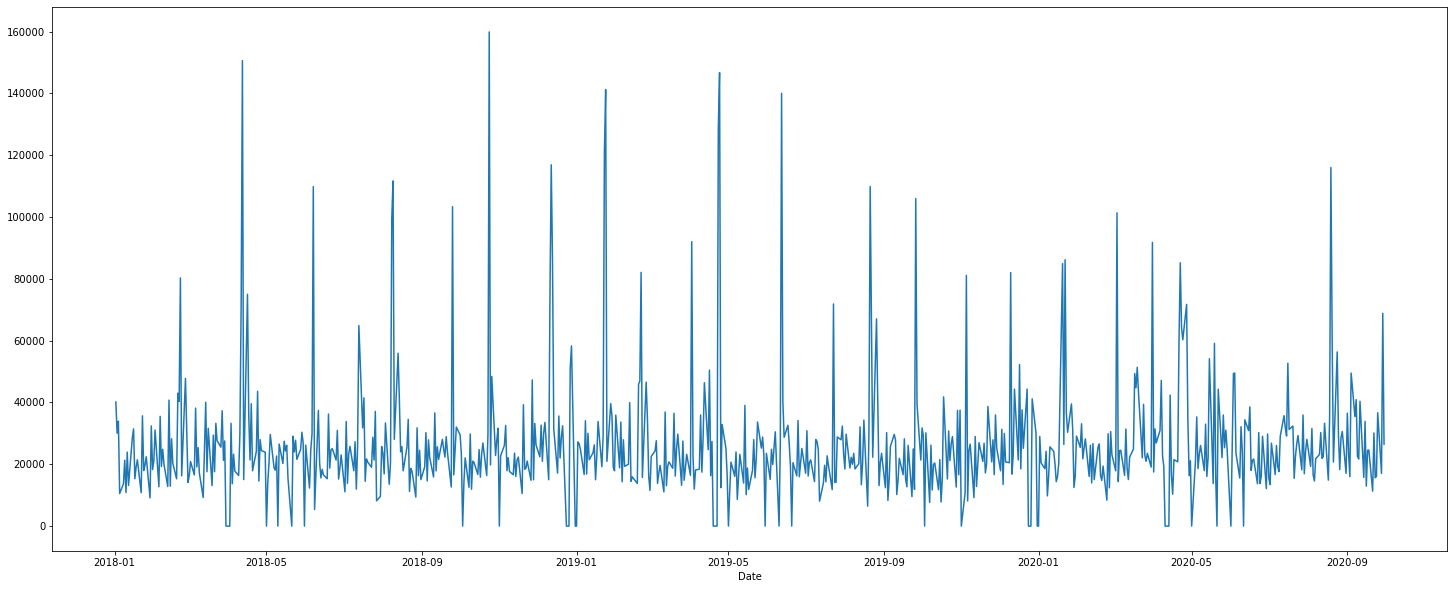

In [89]:

fig=plt.figure(figsize=(25,10))
ax=fig.add_subplot(111)
ax.plot(train_y.index,train_y["AMOUNT"])
ax.set_xlabel("Date")
plt.show()

In [99]:
acf_plot = plot_acf(train_y.AMOUNT, lags=30)  #AR(1) I MA()

In [63]:
acf_plot = plot_pacf(train_y.AMOUNT, lags=20)  

In [90]:
df = pd.DataFrame(train_y, columns = ['AMOUNT'])

p_v = perform_adf_test(df)
if(p_v< 0.05):
    pass
else:
    transformed = transform(df)

    

ADF Statistic: -11.444055
p-value: 0.000000


In [ ]:
# sd = seasonal_decompose(df, period=12)
# combine_seasonal_cols(df, sd)

In [27]:
from statsmodels.tsa.seasonal import STL


In [91]:
stl = STL(train_y)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

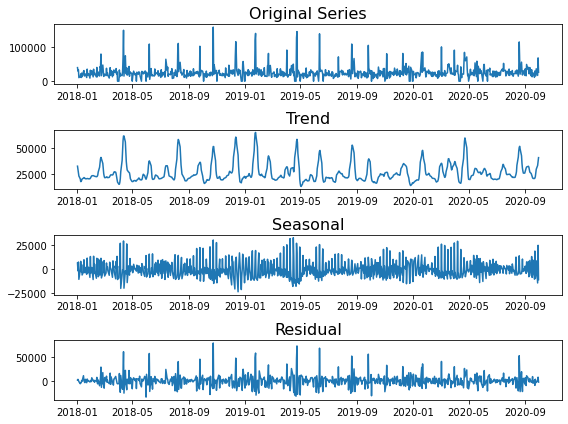

In [29]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(train_y)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

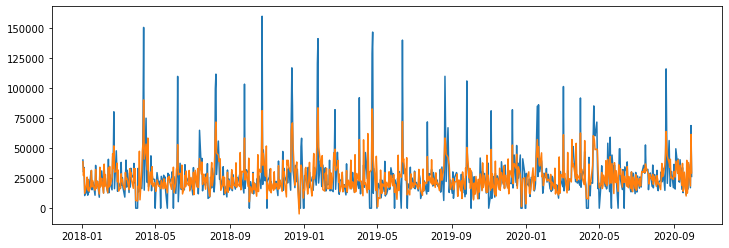

In [92]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(train_y)
plt.plot(estimated)

In [66]:
model = pm.auto_arima(train_y["AMOUNT"],seasonal=True,m=5,start_p=0, start_q=0,max_p=4, max_q=4)  #seasonal True, D=1 enforce seasonality, n_fits=50  # n_jobs=3,stepwise=True 
# make your forecasts
forecast = model.predict(test.shape[0])  # predict N steps into the future

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  717
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -8116.174
Date:                Sun, 30 May 2021   AIC                          16238.347
Time:                        22:13:01   BIC                          16252.073
Sample:                             0   HQIC                         16243.647
                                - 717                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.232e+04   1124.693     19.845      0.000    2.01e+04    2.45e+04
ar.L1          0.1677      0.021      8.005      0.000       0.127       0.209
sigma2      3.981e+08      0.070   5.66e+09      0.0

In [65]:
print(len(train_y))
print(train_y.head())
print(test.head())
print()

717
            AMOUNT
DATE              
2018-01-02   40152
2018-01-03   30048
2018-01-04   33960
2018-01-05   10524
2018-01-08   13692
                 DATE  HOLIDAY  HOLIDAYWEEK  DAYSOFHOLIDAY  LONG2B  LONG1B  \
DATE                                                                         
2020-10-01 2020-10-01        0            1              0       0       0   
2020-10-02 2020-10-02        0            1              0       0       0   
2020-10-05 2020-10-05        0            0              0       0       0   
2020-10-06 2020-10-06        0            0              0       0       0   
2020-10-07 2020-10-07        0            0              0       0       0   

            LONG1A  LONG2A  SHORT1B  SHORT1A  PROMO  PROMOBIG1B  PROMOBIG1A  \
DATE                                                                          
2020-10-01       0       0        0        0  43240           0           0   
2020-10-02       0       0        0        0   9740           0           0   


In [98]:
# print(train_y.head(20))
train_new = train.drop("DATE", axis = 1)
# print(train_new.head(20))
train_new.set_index(train_y.index,inplace=True)

print(train_y.dtypes)
print(train_new.dtypes)

AMOUNT    int64
dtype: object
HOLIDAY          int64
HOLIDAYWEEK      int64
DAYSOFHOLIDAY    int64
LONG2B           int64
LONG1B           int64
LONG1A           int64
LONG2A           int64
SHORT1B          int64
SHORT1A          int64
PROMO            int64
PROMOBIG1B       int64
PROMOBIG1A       int64
PROMOBIG2A       int64
dtype: object


In [94]:
#  selecting P,D,Q and M  (4,0,1)


mod = sm.tsa.statespace.SARIMAX(endog=train_y["AMOUNT"].astype(float),exog=train_new,
                                order=(4,1,1),
                                seasonal_order=(4,0,1,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results = mod.fit()

print(results.summary().tables[1])

            AMOUNT
DATE              
2018-01-02   40152
2018-01-03   30048
2018-01-04   33960
2018-01-05   10524
2018-01-08   13692
2018-01-09   21324
2018-01-10   10861
2018-01-11   23930
2018-01-12   13152
2018-01-15   28512
2018-01-16   31449
2018-01-17   15324
2018-01-18   19092
2018-01-19   21444
2018-01-22   10812
2018-01-23   35678
2018-01-24   17952
2018-01-25   19674
2018-01-26   22440
2018-01-29    9144
            HOLIDAY  HOLIDAYWEEK  DAYSOFHOLIDAY  LONG2B  LONG1B  LONG1A  \
DATE                                                                      
2018-01-02        0            1              0       0       0       1   
2018-01-03        0            1              0       0       0       1   
2018-01-04        0            1              0       0       0       1   
2018-01-05        0            1              0       0       0       1   
2018-01-08        0            0              0       0       0       1   
2018-01-09        0            0              0       0  

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
HOLIDAY       -1.339e+04   1.84e+04     -0.726      0.468   -4.95e+04    2.27e+04
HOLIDAYWEEK    -959.9267   4674.914     -0.205      0.837   -1.01e+04    8202.737
DAYSOFHOLIDAY -1.155e+04   7887.545     -1.464      0.143    -2.7e+04    3910.341
LONG2B        -3495.5679   4218.106     -0.829      0.407   -1.18e+04    4771.767
LONG1B        -1.338e+04   4820.324     -2.775      0.006   -2.28e+04   -3929.858
LONG1A        -9878.5056   5451.361     -1.812      0.070   -2.06e+04     805.965
LONG2A        -4153.8595   4835.426     -0.859      0.390   -1.36e+04    5323.402
SHORT1B        2742.4663   3479.842      0.788      0.431   -4077.899    9562.831
SHORT1A       -5086.0454   6078.845     -0.837      0.403    -1.7e+04    6828.272
PROMO             0.2345      0.021     11.179      0.000       0.193       0.276
PROMOBIG1B     -

In [82]:
test_new = test
test1 =test.drop("DATE",axis=1)
print(test1.shape)

(66, 13)


In [83]:
# print(d_new.head())
# print(df_new.tail(30))
# to_forecast = df_new[df_new["DATE"]>= df_new[pd.to_datetime("2020-12-01")].iloc[0]]

# # to_forecast=df[df["DATE"]>= df["STARTDATE"].iloc[0]]


predictsss=results.forecast(len(test1),exog=test1).to_frame()

# print(predictsss)
predictsss.set_index(test_new["DATE"],inplace=True)

predictsss=predictsss[predictsss["predicted_mean"]>0]


print(predictsss)

            predicted_mean
DATE                      
2020-10-01    35911.131515
2020-10-02    35710.874417
2020-10-05    23946.631031
2020-10-06    28543.562604
2020-10-07    23500.992048
...                    ...
2020-12-22    23143.260200
2020-12-23    20069.707607
2020-12-28    17424.503720
2020-12-29    21133.598276
2020-12-30    18310.761490

[63 rows x 1 columns]


In [84]:
idx = pd.date_range(test_new["DATE"].iloc[0], test_new["DATE"].iloc[-1])
predictsss=predictsss.reindex(idx,fill_value=0)   # filling weekends with 0

In [85]:
predictsss

predicted_mean
2020-10-01    35911.131515
2020-10-02    35710.874417
2020-10-03        0.000000
2020-10-04        0.000000
2020-10-05    23946.631031
...                    ...
2020-12-27        0.000000
2020-12-28    17424.503720
2020-12-29    21133.598276
2020-12-30    18310.761490
2020-12-31        0.000000

[92 rows x 1 columns]

In [86]:
predictsss.index=pd.to_datetime(predictsss.index)
predictsss["DATE"]= predictsss.index.strftime('%Y-%m-%d')
predictsss.to_json("RESULTS.json",date_format = '%Y-%m-%d', orient ='records')

In [87]:



fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
# ax.plot(train["DATE"][:], y_train, c='blue')
ax.plot(predictsss.index, predictsss["predicted_mean"], c='blue')
ax.plot(train_y.index, train_y["AMOUNT"], c="red")
plt.show()